In [1]:
import artm
import time
import os
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
from matplotlib import pyplot as plt

In [2]:
train_data_path = 'data/lenta_transformed_tm_train.txt'
batch_folder = 'data/lenta_tm'

In [3]:
batch_vectorizer = artm.BatchVectorizer(
    data_path=train_data_path,
    data_format='vowpal_wabbit',
    target_folder=batch_folder,
    batch_size=10000)
dictionary = artm.Dictionary(data_path=batch_folder)

### Base model

In [13]:
base_model_dump_path = 'models/base_model'

model = artm.ARTM(
    num_processors=10,
    num_topics=200,
    num_document_passes=1,
    dictionary=dictionary,
    class_ids={
        '@default_class': 1.0,
        'month': 5.0,
        'time': 2.0
    }
)

# add scorers
model.scores.add(artm.PerplexityScore(name='perplexity', dictionary=dictionary))
model.scores.add(artm.TopTokensScore(name='top-tokens', num_tokens=10))
model.scores.add(artm.SparsityPhiScore(name='sparsity'))

# to force small probabilities of words belonging to theme to zero
model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='sparsing', tau=-1))

In [14]:
%%time
# fit
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=20)

CPU times: user 2h 36min 17s, sys: 1min 11s, total: 2h 37min 28s
Wall time: 25min 54s


Perplexity values:  [72670.78125, 1969.5595703125, 1860.01416015625, 1832.7921142578125, 1795.462646484375, 1738.474853515625, 1649.3590087890625, 1514.130859375, 1332.209716796875, 1132.1627197265625, 948.4573364257812, 797.66357421875, 680.2081298828125, 588.7064819335938, 517.0303955078125, 460.71160888671875, 416.42340087890625, 381.46417236328125, 353.4716491699219, 330.8034362792969]
Sparsity  values:  [0.9462441205978394, 0.9542505741119385, 0.9600226283073425, 0.9647234678268433, 0.9689082503318787, 0.9728456139564514, 0.9766691327095032, 0.980426549911499, 0.984045684337616, 0.9873446822166443, 0.9901841282844543, 0.9924618005752563, 0.9941869974136353, 0.99549400806427, 0.9964917302131653, 0.9972450733184814, 0.9978177547454834, 0.9982567429542542, 0.9985938668251038, 0.9988499879837036]


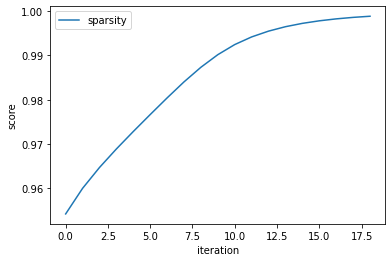

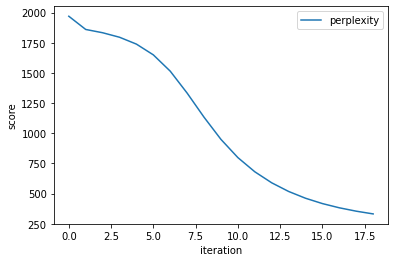

In [15]:
# plot scores
print("Perplexity values: ", model.score_tracker['perplexity'].value)
print("Sparsity  values: ", model.score_tracker['sparsity'].value)
plt.plot(model.score_tracker['sparsity'].value[1:], label='sparsity')
plt.legend(loc='best')
plt.xlabel('iteration')
plt.ylabel('score')
plt.show()
plt.plot(model.score_tracker['perplexity'].value[1:], label='perplexity')
plt.legend(loc='best')
plt.xlabel('iteration')
plt.ylabel('score')
plt.show()

In [16]:
for topic_name in model.topic_names:
    print(topic_name + ': ')
    print(model.score_tracker['top-tokens'].last_tokens[topic_name])

topic_0: 
['предлагать', 'законопроект', 'год', '2013', 'использование', 'отчет', 'бюджетный', 'это', 'собственность', 'внешний']
topic_1: 
['год', '»,', '2010', 'форум', '2000', '2002', 'свободный', '2011', '—', 'петербургский']
topic_2: 
['сотрудник', 'убийство', 'милиция', 'молодой', 'подозреваемый', 'милиционер', 'борис', 'избивать', 'причастность', 'отдел']
topic_3: 
['принимать', 'база', 'который', 'борьба', 'участие', 'пентагон', 'сша', 'также', 'культурный', 'миротворец']
topic_4: 
['год', 'долг', 'условие', 'кризис', 'египет', 'сумма', '2011', 'срок', 'втб', 'требование']
topic_5: 
['украина', 'киев', 'визит', 'порошенко', 'делегация', 'сбу', 'советник', 'госсекретарь', 'евровидение', 'россия']
topic_6: 
['бывший', 'пост', 'заявлять', 'министр', 'который', 'глава', 'политик', 'свой', 'касьянов', '...']
topic_7: 
['германия', 'немецкий', 'отмечать', 'политика', 'должность', 'иностранный', 'министр', 'меркель', 'фрг', 'правительство']
topic_8: 
['директор', 'театр', 'руководител

In [20]:
%%time
# fit
model.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=10)

CPU times: user 1h 18min 27s, sys: 39.3 s, total: 1h 19min 7s
Wall time: 13min 31s


Perplexity values:  [72670.78125, 1969.5595703125, 1860.01416015625, 1832.7921142578125, 1795.462646484375, 1738.474853515625, 1649.3590087890625, 1514.130859375, 1332.209716796875, 1132.1627197265625, 948.4573364257812, 797.66357421875, 680.2081298828125, 588.7064819335938, 517.0303955078125, 460.71160888671875, 416.42340087890625, 381.46417236328125, 353.4716491699219, 330.8034362792969, 312.7523193359375, 298.8958435058594, 288.42144775390625, 280.30853271484375, 273.96173095703125, 269.1690979003906, 265.6474304199219, 263.0494384765625, 261.09564208984375, 259.6081237792969]
Sparsity  values:  [0.9462441205978394, 0.9542505741119385, 0.9600226283073425, 0.9647234678268433, 0.9689082503318787, 0.9728456139564514, 0.9766691327095032, 0.980426549911499, 0.984045684337616, 0.9873446822166443, 0.9901841282844543, 0.9924618005752563, 0.9941869974136353, 0.99549400806427, 0.9964917302131653, 0.9972450733184814, 0.9978177547454834, 0.9982567429542542, 0.9985938668251038, 0.998849987983703

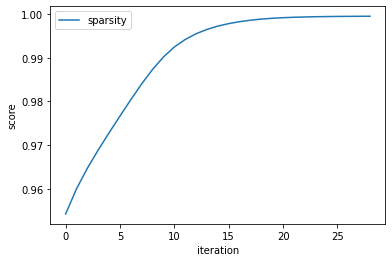

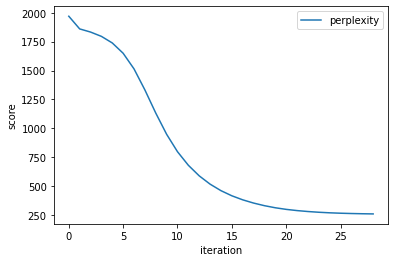

In [21]:
# plot scores
print("Perplexity values: ", model.score_tracker['perplexity'].value)
print("Sparsity  values: ", model.score_tracker['sparsity'].value)
plt.plot(model.score_tracker['sparsity'].value[1:], label='sparsity')
plt.legend(loc='best')
plt.xlabel('iteration')
plt.ylabel('score')
plt.show()
plt.plot(model.score_tracker['perplexity'].value[1:], label='perplexity')
plt.legend(loc='best')
plt.xlabel('iteration')
plt.ylabel('score')
plt.show()

In [22]:
for topic_name in model.topic_names:
    print(topic_name + ': ')
    print(model.score_tracker['top-tokens'].last_tokens[topic_name])

topic_0: 
['предлагать', 'законопроект', '2013', 'использование', 'вносить', 'вариант', '2003', 'отчет', 'связывать', 'бюджетный']
topic_1: 
['»,', 'год', '2010', 'форум', '2000', '2002', 'свободный', 'петербургский', 'стихотворение', 'ежегодный']
topic_2: 
['сотрудник', 'убийство', 'милиция', 'подозреваемый', 'молодой', 'милиционер', 'борис', 'отдел', 'избивать', 'причастность']
topic_3: 
['принимать', 'участие', 'база', 'борьба', 'пентагон', 'культурный', 'миротворец', 'который', 'наследие', 'авиабаза']
topic_4: 
['2011', 'срок', 'сумма', 'долг', 'условие', 'требование', 'кризис', 'египет', 'год', 'втб']
topic_5: 
['украина', 'киев', 'визит', 'делегация', 'сбу', 'советник', 'госсекретарь', 'евровидение', 'возвращение', 'яценюк']
topic_6: 
['бывший', 'пост', 'давать', 'политик', 'повод', 'касьянов', '...', 'хозяйство', 'официально', 'просить']
topic_7: 
['отмечать', 'германия', 'иностранный', 'должность', 'немецкий', 'политика', 'меркель', 'фрг', 'берлин', 'фон']
topic_8: 
['директор'

In [25]:
# save
model.dump_artm_model(base_model_dump_path)

Еще не сошлись по perplexity, нужно обучать еще

Попробуем использовать модальности: добавим регуляризацию по ним (по каждой из модальностей default_class / month / time)

Будем дообучать базовую модель в течение 7 проходов по коллекции

In [27]:
%%time

# Запустим перебор по параметрам

grid = ParameterGrid({'tau': [-1, 10]})
scores = dict()
grid_iterator = tqdm(grid)
for item in grid_iterator:

    # default_class
    model = artm.load_artm_model(base_model_dump_path)
    model.scores.add(artm.PerplexityScore(name='perplexity', dictionary=dictionary), overwrite=True)
    model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='smoothing_def',
                                                           tau=item['tau'],
                                                           class_ids=['@default_class']))
    iterator = tqdm(range(7))
    for i in iterator:
        model.fit_offline(batch_vectorizer, num_collection_passes=1)
    scores["default_class_" + str(item)] = dict()
    scores["default_class_" + str(item)]['perplexity'] = model.score_tracker['perplexity'].value
    scores["default_class_" + str(item)]['sparsity'] = model.score_tracker['sparsity'].value

    # month
    model = artm.load_artm_model(base_model_dump_path)
    model.scores.add(artm.PerplexityScore(name='perplexity', dictionary=dictionary), overwrite=True)
    model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='smoothing_month',
                                                           tau=item['tau'],
                                                           class_ids=['month']))
    iterator = tqdm(range(7))
    for i in iterator:
        model.fit_offline(batch_vectorizer, num_collection_passes=1)
    scores["month_" + str(item)] = dict()
    scores["month_" + str(item)]['perplexity'] = model.score_tracker['perplexity'].value
    scores["month_" + str(item)]['sparsity'] = model.score_tracker['sparsity'].value
    
    
    # time
    model = artm.load_artm_model(base_model_dump_path)
    model.scores.add(artm.PerplexityScore(name='perplexity', dictionary=dictionary), overwrite=True)
    model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='smoothing_time',
                                                           tau=item['tau'],
                                                           class_ids=['time']))
    iterator = tqdm(range(7))
    for i in iterator:
        model.fit_offline(batch_vectorizer, num_collection_passes=1)
    scores["time_" + str(item)] = dict()
    scores["time_" + str(item)]['perplexity'] = model.score_tracker['perplexity'].value
    scores["time_" + str(item)]['sparsity'] = model.score_tracker['sparsity'].value

100%|██████████| 7/7 [09:34<00:00, 82.10s/it]

100%|██████████| 7/7 [09:13<00:00, 79.09s/it]

100%|██████████| 7/7 [09:42<00:00, 83.15s/it]

100%|██████████| 7/7 [09:13<00:00, 79.13s/it]

100%|██████████| 2/2 [56:31<00:00, 1695.86s/it]

CPU times: user 5h 34min 14s, sys: 6min 32s, total: 5h 40min 47s
Wall time: 56min 31s


In [29]:
scores.keys()

dict_keys(["default_class_{'tau': -1}", "month_{'tau': -1}", "time_{'tau': -1}", "default_class_{'tau': 10}", "month_{'tau': 10}", "time_{'tau': 10}"])

In [35]:
for key in scores.keys():
    print("Model: {} perplexity: {} sparsity {}".format(key, scores[key]['perplexity'][-1], scores[key]['sparsity'][-1]))

Model: default_class_{'tau': -1} perplexity: 255.36856079101562 sparsity 0.9995311498641968
Model: month_{'tau': -1} perplexity: 255.37503051757812 sparsity 0.9995285272598267
Model: time_{'tau': -1} perplexity: 255.36734008789062 sparsity 0.9995285272598267
Model: default_class_{'tau': 10} perplexity: 1994.685791015625 sparsity 0.0
Model: month_{'tau': 10} perplexity: 255.6238555908203 sparsity 0.9995285272598267
Model: time_{'tau': 10} perplexity: 255.9635467529297 sparsity 0.9995285272598267


Качество стало чуть-чуть лучше (меньше perplexity, больше sparsity)